In [ ]:
# Pymaceuticals Inc.
# Analysis
# - Most mice were treated capomulin and ramicane - most effective on mice were their final avg. tumor volumes were lower.
# - Strong correlation between weight and tumor volume for capomulin treated mice. Heavier mice = larger tumors
# - Mouse 1509's tumor volumes decreased with capomulin treatment

In [2]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
# Prepare the Data
# Load the data
mouse_metadata = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\(Copy) bootcamp\Github challenges or Projects\Module 05 Challenge\Starter_Code\Pymaceuticals\data\mouse_metadata.csv')
study_results = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\(Copy) bootcamp\Github challenges or Projects\Module 05 Challenge\Starter_Code\Pymaceuticals\data\study_results.csv')

In [4]:
# Merge the DataFrames
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

In [5]:
# Display the first few rows of the merged data
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Display the number of unique Mouse IDs
unique_mice = merged_data['Mouse ID'].nunique()
print(f"Unique mice count: {unique_mice}")

Unique mice count: 249


In [7]:
# Check for duplicate Mouse IDs and Timepoints
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate entries found:")
duplicates

Duplicate entries found:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Remove duplicates to create a clean dataset
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [9]:
# Display the updated number of unique Mouse IDs
cleaned_unique_mice = cleaned_data['Mouse ID'].nunique()
print(f"Cleaned unique mice count: {cleaned_unique_mice}")

Cleaned unique mice count: 249


In [10]:
# Generate Summary Statistics
# Group by 'Drug Regimen' and calculate statistics
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


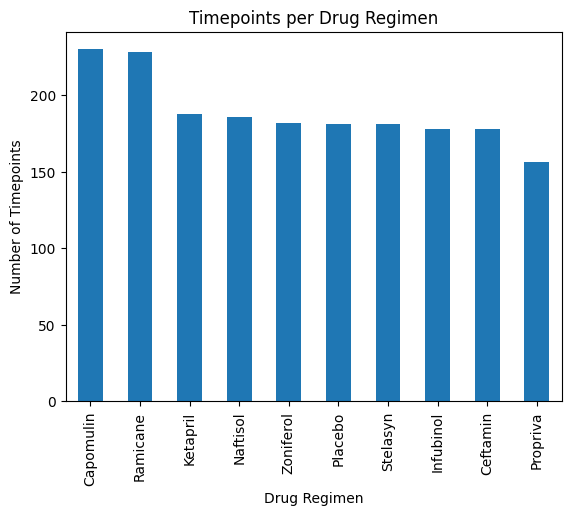

In [11]:
# Create Bar Charts and Pie Charts
# Bar chart with Pandas
timepoints_per_drug = cleaned_data['Drug Regimen'].value_counts()
timepoints_per_drug.plot(kind='bar', title='Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

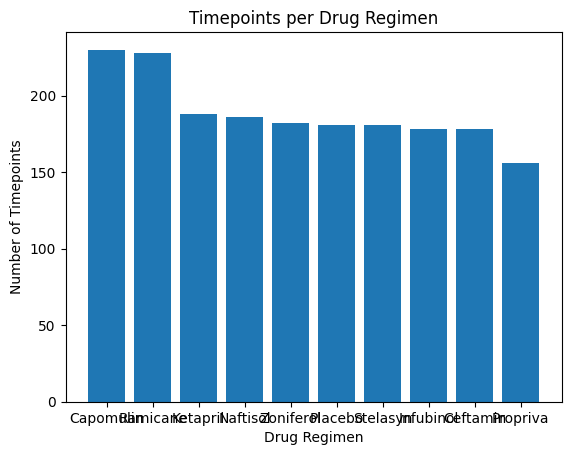

In [12]:
# Bar chart with Matplotlib
plt.bar(timepoints_per_drug.index, timepoints_per_drug.values)
plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

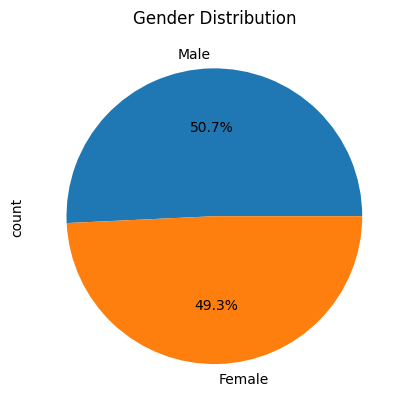

In [13]:
# Pie chart with Pandas
gender_distribution = cleaned_data['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')
plt.show()

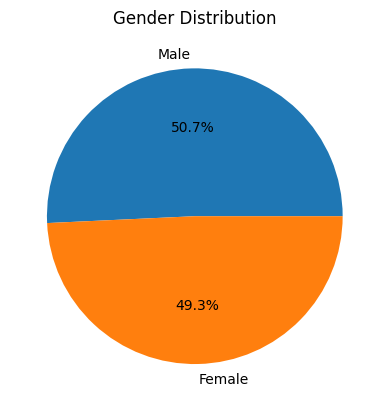

In [14]:
# Pie chart with Matplotlib
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [15]:
# Calculate Quartiles, Find Outliers, and Create a Box Plot
# Get the last (max) time point for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoint_data = pd.merge(max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

In [16]:
# Treatment list and empty list for tumor volumes
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

In [17]:
for treatment in treatments:
    treatment_data = max_timepoint_data[max_timepoint_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(treatment_data)

    # Calculate IQR and potential outliers
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} outliers: {outliers}")

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


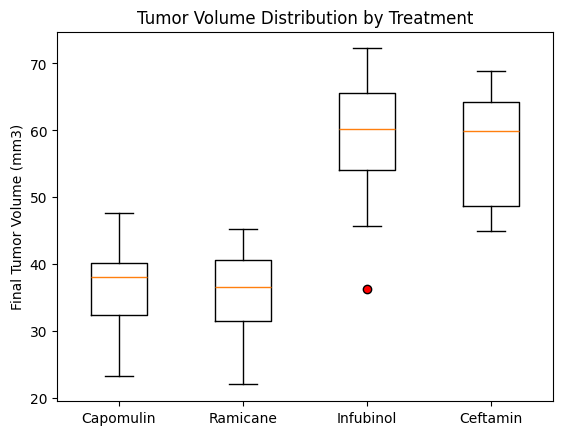

In [18]:
# Box plot with outliers highlighted
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))
ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

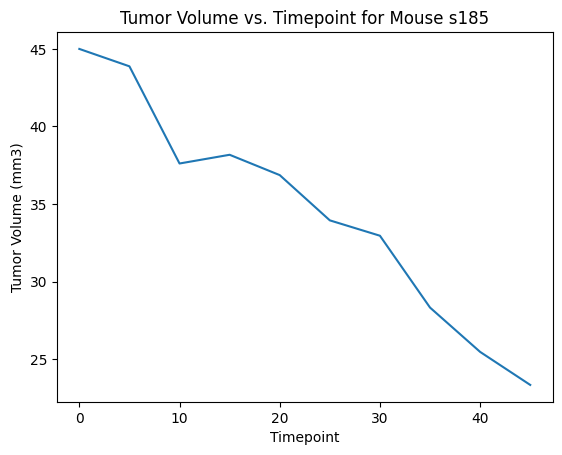

In [19]:
# Create a Line Plot and a Scatter Plot
# Line plot for a single mouse treated with Capomulin
capomulin_mouse = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 's185')]
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Timepoint for Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

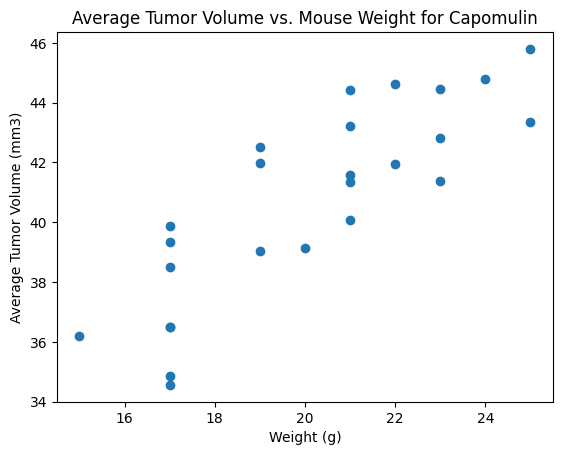

In [20]:
# Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the mean for the numeric columns only
avg_tumor_volume = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)

# Plot the scatter plot
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [21]:
# Calculate Correlation and Regression
# Correlation coefficient
correlation = stats.pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation[0]}")

Correlation coefficient: 0.8419363424694721


In [22]:
# Linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
regress_values = avg_tumor_volume['Weight (g)'] * slope + intercept

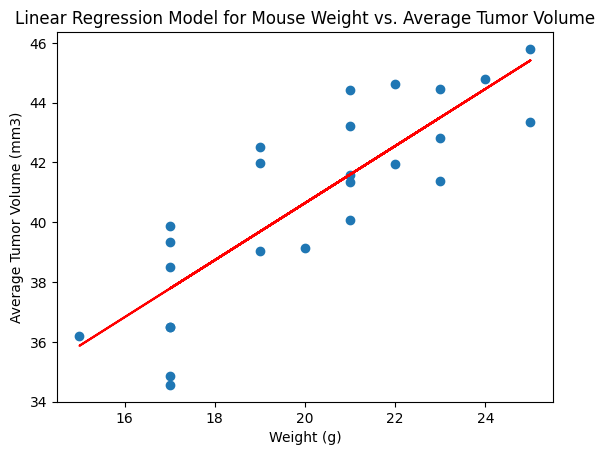

In [23]:
# Plot linear regression model
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.plot(avg_tumor_volume['Weight (g)'], regress_values, color='red')
plt.title('Linear Regression Model for Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()